In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [33]:
merged_data = pd.read_csv('merged_data.csv')

In [47]:
X = merged_data[['tempmax', 'tempmin', 'temp', ' prcp', 'humidity', 'Maximum']]
y = merged_data['Average']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [51]:
predictions = model.predict(X_test)

In [52]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 11.181814626865132


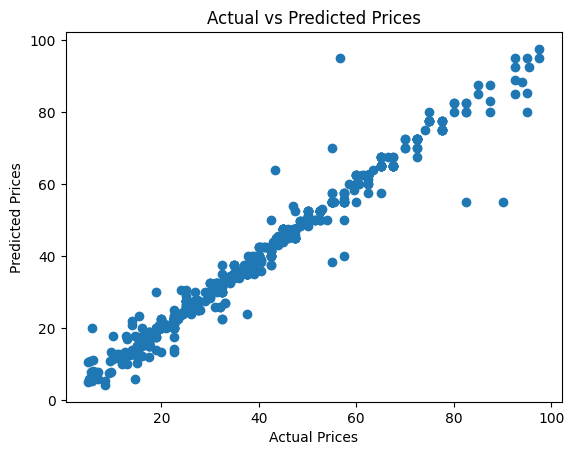

In [53]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [54]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)

R-squared: 0.9681196770555287


In [70]:
future_data = pd.DataFrame({
    'tempmax': [30, 32, 31],   # Example maximum temperature values for future dates
    'tempmin': [20, 22, 21],   # Example minimum temperature values for future dates
    'temp': [25, 27, 26],      # Example temperature values for future dates
    ' prcp': [0.1, 0.2, 0.0],  # Example precipitation values for future dates
    'humidity': [50, 60, 55],  # Example humidity values for future dates
    'Maximum': [70, 50, 60] # Example maximum price values for future dates
})

In [71]:
# Make predictions for future dates using the trained model
future_predictions = model.predict(future_data)

# Create a DataFrame with the future dates and corresponding predictions
future_dates = pd.date_range(start='2024-01-01', end='2024-01-03')  # Example future dates
future_predictions_df = pd.DataFrame({'Date': future_dates, 'Predicted_Price': future_predictions})

# Display the predictions for future dates
print(future_predictions_df)

        Date  Predicted_Price
0 2024-01-01             67.5
1 2024-01-02             45.0
2 2024-01-03             55.0
